# Intro

<b> Basics steps used when creating a feed forward network: <b>

* Create tensors/placehoders/constants/etc.
* Define Loss
* Defne Gradient
* Intialize variables
* Create a session
* Run graph in a session
* Close session

<img src='net1.png'><br/>
<img src='net2.png'><br/>
<img src='net3.png'><br/>


<b> Loss Functions </b>
* Absolute error
* Cross Entropy Loss ( sigmoid, softmax)
* LogLoss
* Check full list @ https://www.tensorflow.org/api_docs/python/tf/losses

<b> Activation Functions </b>

* Full List @ https://en.wikipedia.org/wiki/Activation_function

<b> Links </b>
* https://www.tensorflow.org/tutorials/keras/basic_classification
* https://medium.com/tensorist/classifying-fashion-articles-using-tensorflow-fashion-mnist-f22e8a04728a
* https://www.katacoda.com/basiafusinska/courses/tensorflow-getting-started/tensorflow-mnist-beginner
* https://theneuralperspective.com/2016/10/02/03-vanilla-neural-network/
* https://data-flair.training/blogs/tensorflow-mnist-dataset/
* https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c
* http://adventuresinmachinelearning.com/python-tensorflow-tutorial/


# Cheatsheet

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [214]:
# Python optimisation variables
learning_rate = 0.1
epochs = 20
batch_size = 100

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

In [215]:
# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

# now calculate the hidden layer output - in this case, let's use a softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [216]:
# start the session
sess = tf.Session()
# initialise the variables
sess.run(init_op)
total_batch = int(len(mnist.train.labels) / batch_size)
for epoch in range(epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
        _, c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 0.802
Epoch: 2 cost = 0.418
Epoch: 3 cost = 0.312
Epoch: 4 cost = 0.247
Epoch: 5 cost = 0.204
Epoch: 6 cost = 0.174
Epoch: 7 cost = 0.151
Epoch: 8 cost = 0.134
Epoch: 9 cost = 0.119
Epoch: 10 cost = 0.107
Epoch: 11 cost = 0.096
Epoch: 12 cost = 0.087
Epoch: 13 cost = 0.079
Epoch: 14 cost = 0.072
Epoch: 15 cost = 0.065
Epoch: 16 cost = 0.059
Epoch: 17 cost = 0.055
Epoch: 18 cost = 0.050
Epoch: 19 cost = 0.046
Epoch: 20 cost = 0.042
Epoch: 21 cost = 0.039
Epoch: 22 cost = 0.036
Epoch: 23 cost = 0.033
Epoch: 24 cost = 0.031
Epoch: 25 cost = 0.028
Epoch: 26 cost = 0.026
Epoch: 27 cost = 0.025
Epoch: 28 cost = 0.022
Epoch: 29 cost = 0.021
Epoch: 30 cost = 0.020
0.9801


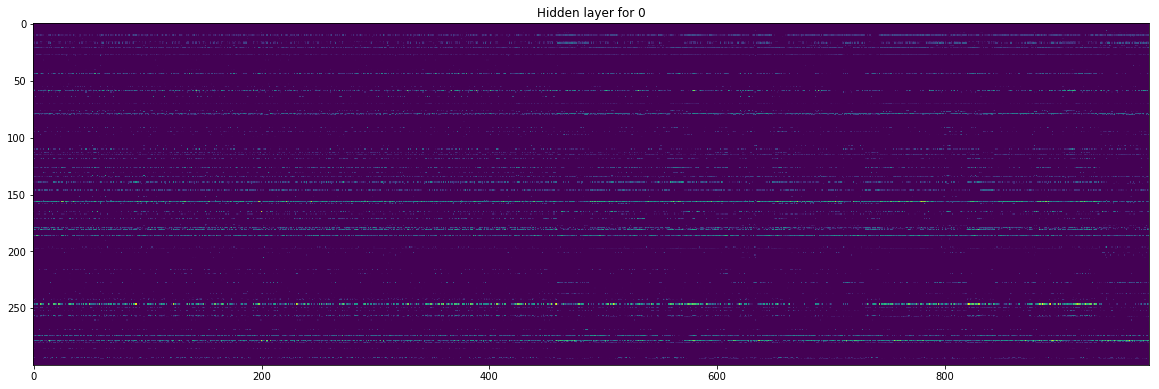

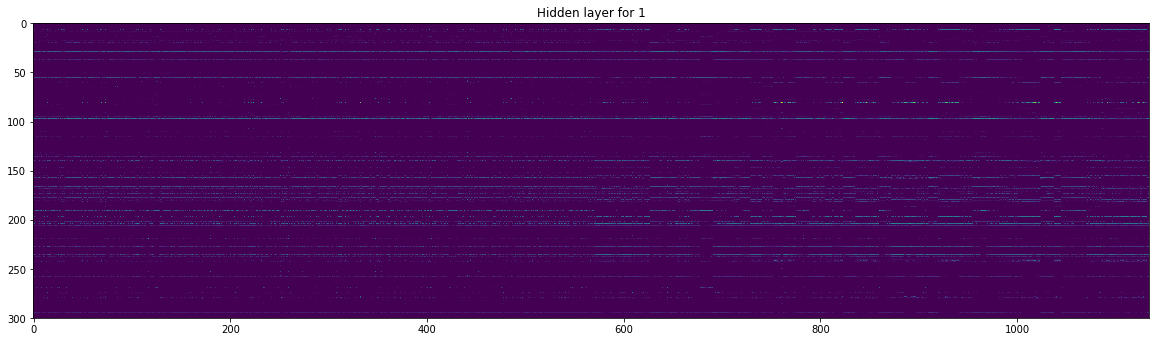

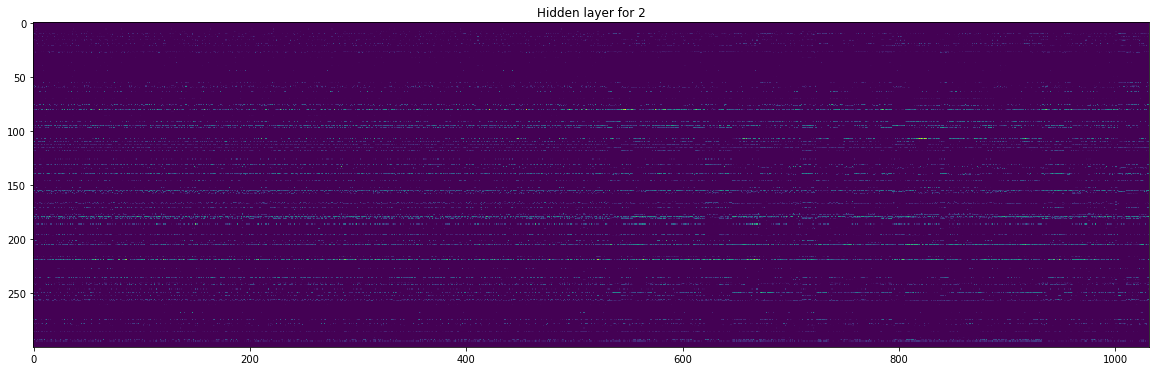

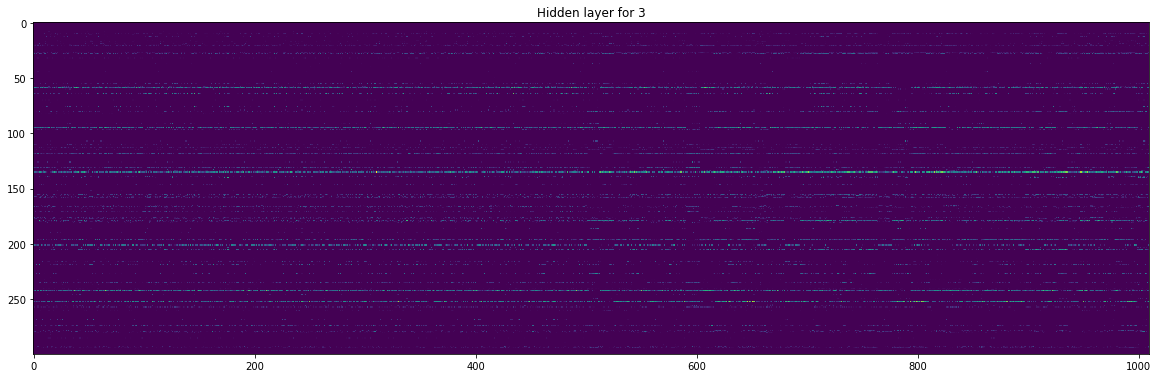

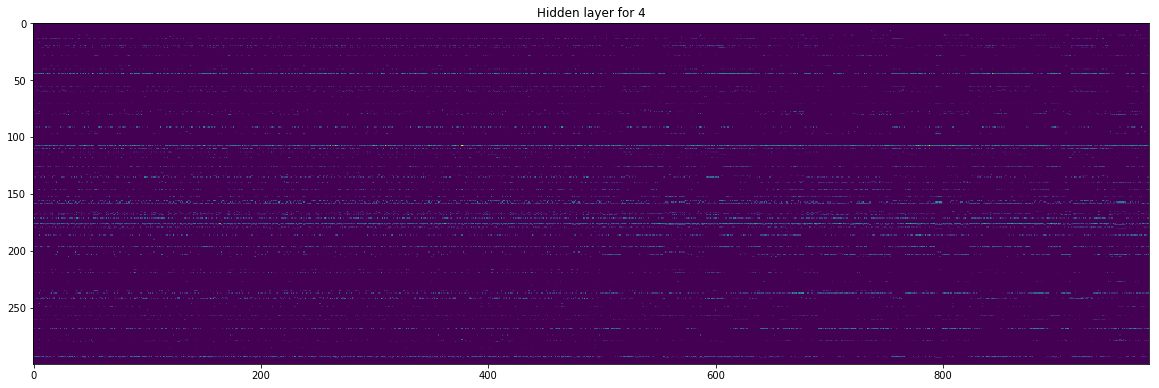

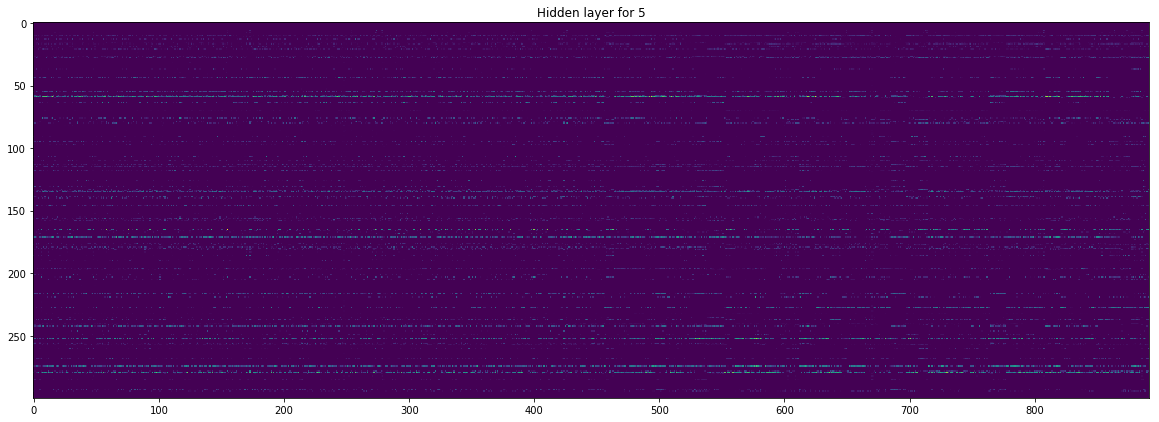

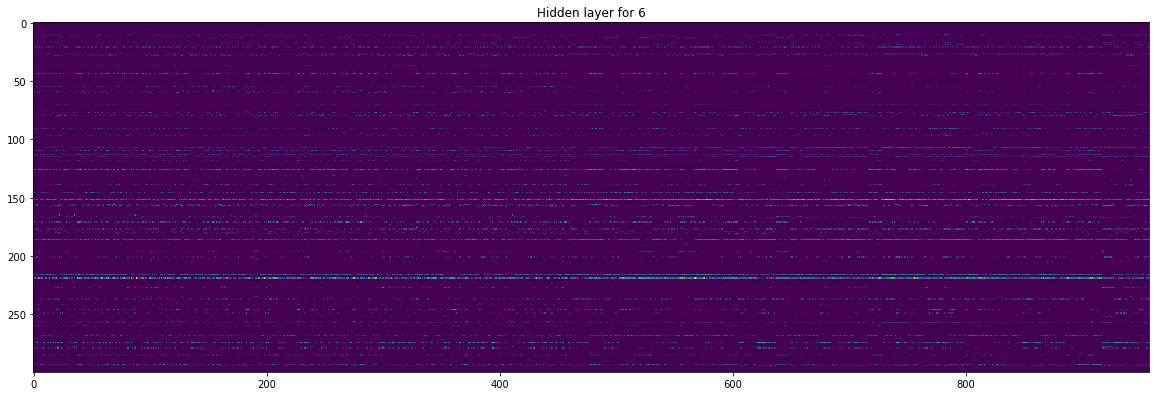

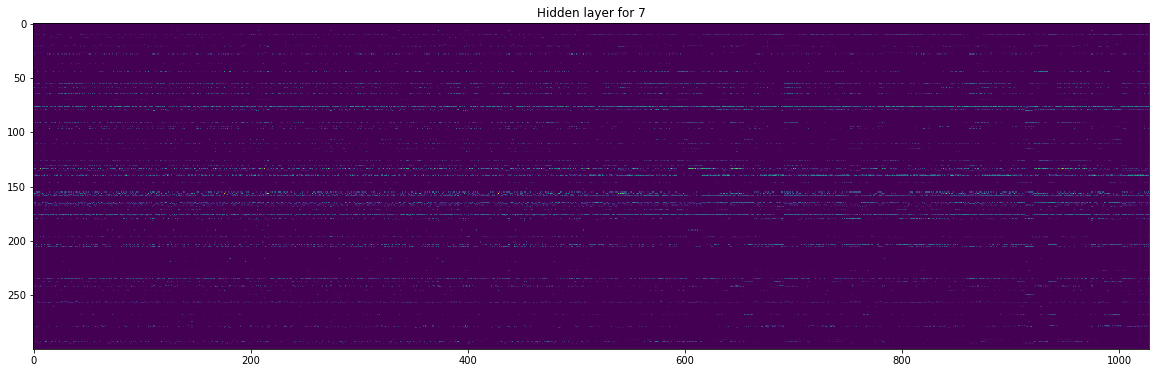

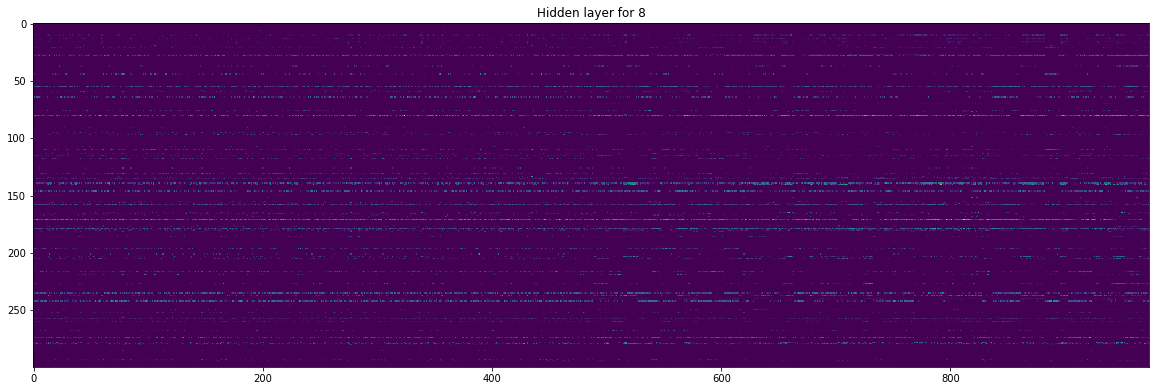

In [5]:
label_ind = mnist.test.labels == 1

plt.rcParams["figure.figsize"] = (4,10)

for label in range(0,9):
    input_data = mnist.test.images[label_ind[:,label]]
    hidden_layer = sess.run(hidden_out, feed_dict = {x: input_data})
    
    plt.figure(figsize=(20,20))
    plt.imshow(hidden_layer.T)
    plt.title("Hidden layer for " + str(label))
    plt.show()

Now we want to define a new network to gradient descent the optimal input data to output the indicator output values for each label. We will do this on the trained network, to view what the "ideal" input image is for 0,1,...,9.

In [217]:
trained_W1 = sess.run(W1)
trained_b1 = sess.run(b1)
trained_W2 = sess.run(W2)
trained_b2 = sess.run(b2)

In [253]:
# Create graph with variables as input, and constants as weights
learning_rate = 0.1
penalty = 0.15

# now declare the output data placeholder - 10 digits
x = tf.Variable(tf.random_uniform([1,784], minval=0, maxval=1), tf.float32, name='input_image')
y = tf.placeholder(tf.float32, [None, 10], name="output_y")

W1 = tf.placeholder(tf.float32, [784, 300])
b1 = tf.placeholder(tf.float32, [300])
W2 = tf.placeholder(tf.float32, [300, 10])
b2 = tf.placeholder(tf.float32, [10])

# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

# now calculate the hidden layer output - in this case, let's use a softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1)) + penalty*tf.reduce_sum(x**2)

# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cost = 50.716713
Cost = 0.28493798
Cost = 0.19797456
Cost = 0.19772267
Cost = 0.19776002
Cost = 0.19774243
Cost = 0.19775614
Cost = 0.1977359
Cost = 0.19772771
Cost = 0.19774131
1.0
[[9.8348743e-01 8.8785670e-04 3.5190757e-03 2.4697731e-05 5.2288310e-06
  7.2828545e-03 2.5347748e-04 4.5207054e-03 1.8407951e-06 1.6853812e-05]]


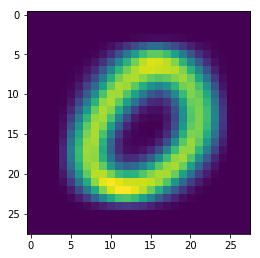

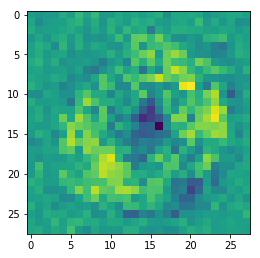

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Cost = 52.67
Cost = 0.1712129
Cost = 0.06699095
Cost = 0.066478856
Cost = 0.06647803
Cost = 0.0664787
Cost = 0.06647855
Cost = 0.06647813
Cost = 0.06647825
Cost = 0.066478446
1.0
[[2.9234876e-05 9.9129593e-01 2.2426974e-03 5.2089151e-04 1.7925935e-05
  3.8414048e-03 2.9476365e-05 1.9430215e-03 2.5520055e-07 7.9206307e-05]]


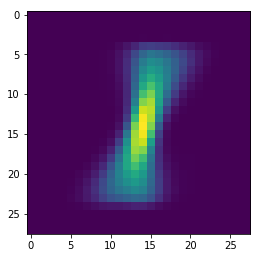

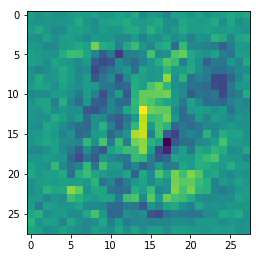

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Cost = 47.76787
Cost = 0.19088121
Cost = 0.100108646
Cost = 0.099857055
Cost = 0.09986232
Cost = 0.09986096
Cost = 0.099856645
Cost = 0.09985428
Cost = 0.099861026
Cost = 0.099851295
1.0
[[2.5432496e-04 4.6184734e-03 9.9066132e-01 2.3903858e-04 5.0468648e-06
  2.9924565e-03 1.9417952e-04 1.0337990e-03 3.8911230e-07 1.0383020e-06]]


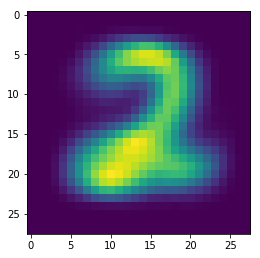

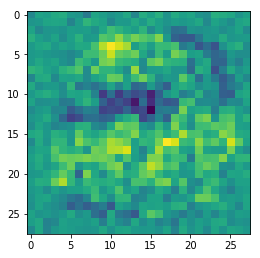

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Cost = 48.51803
Cost = 0.2396132
Cost = 0.1427078
Cost = 0.1423657
Cost = 0.14231652
Cost = 0.14232077
Cost = 0.1423292
Cost = 0.14232253
Cost = 0.14231482
Cost = 0.1423301
1.0
[[1.03021775e-05 4.34613647e-03 9.03054199e-04 9.87973571e-01
  3.64427251e-07 4.18733852e-03 8.65054631e-07 2.46836175e-03
  8.57384777e-08 1.10027999e-04]]


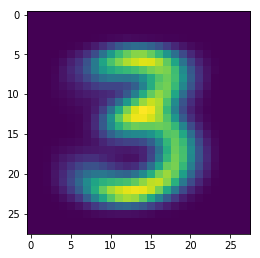

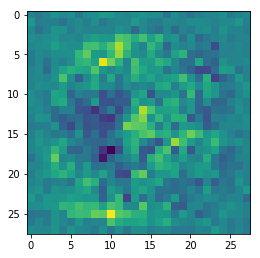

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Cost = 51.87524
Cost = 0.266977
Cost = 0.16932322
Cost = 0.16905044
Cost = 0.1690685
Cost = 0.16908371
Cost = 0.16904168
Cost = 0.16905259
Cost = 0.16907033
Cost = 0.16908877
1.0
[[2.5722216e-05 3.0924263e-03 5.0405494e-04 1.5681773e-05 9.8729336e-01
  4.5168786e-03 2.3036552e-04 4.2869383e-03 1.8287113e-06 3.2646367e-05]]


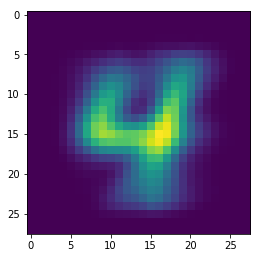

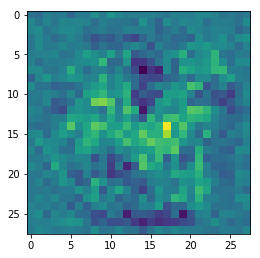

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Cost = 47.727154
Cost = 0.110520005
Cost = 0.026037654
Cost = 0.025834717
Cost = 0.025835909
Cost = 0.025835589
Cost = 0.02583426
Cost = 0.025836445
Cost = 0.025834888
Cost = 0.025834845
1.0
[[1.2484261e-04 2.4570450e-03 2.3806198e-04 1.1953465e-04 1.4716416e-05
  9.9558181e-01 2.2448781e-05 1.3849960e-03 1.6085236e-06 5.4902226e-05]]


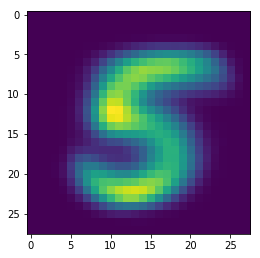

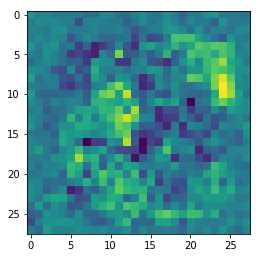

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Cost = 51.94798
Cost = 0.29684144
Cost = 0.19783436
Cost = 0.19711939
Cost = 0.1971296
Cost = 0.19707252
Cost = 0.19708435
Cost = 0.197081
Cost = 0.1971007
Cost = 0.19709903
1.0
[[3.6029573e-04 4.3983473e-03 4.0657781e-03 1.6705408e-05 2.1773430e-04
  5.5768369e-03 9.8454964e-01 7.9259585e-04 7.8037092e-06 1.4324681e-05]]


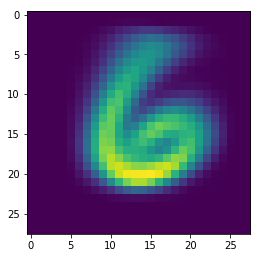

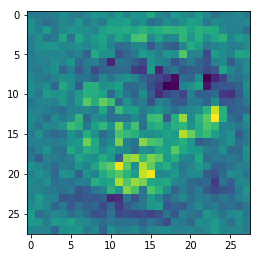

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Cost = 54.707733
Cost = 0.14735952
Cost = 0.056701742
Cost = 0.056361943
Cost = 0.056363784
Cost = 0.05636547
Cost = 0.05635926
Cost = 0.056348745
Cost = 0.056351125
Cost = 0.05635718
1.0
[[1.40598320e-04 1.88371341e-03 1.92693755e-04 1.51922897e-04
  4.28892272e-05 3.45743238e-03 5.79689186e-06 9.94012415e-01
  8.84462494e-08 1.12406284e-04]]


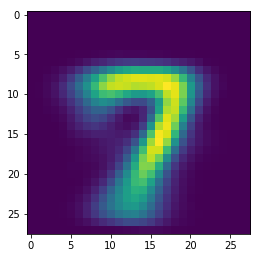

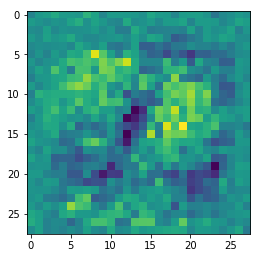

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Cost = 39.386417
Cost = 0.38153625
Cost = 0.29798043
Cost = 0.29779148
Cost = 0.2976343
Cost = 0.29767716
Cost = 0.29766467
Cost = 0.29765597
Cost = 0.29776528
Cost = 0.29772103
1.0
[[2.6344898e-04 2.2532514e-03 1.9592901e-03 1.5831960e-04 2.3178558e-04
  1.0129353e-02 1.0508955e-03 1.0672075e-03 9.8165542e-01 1.2309393e-03]]


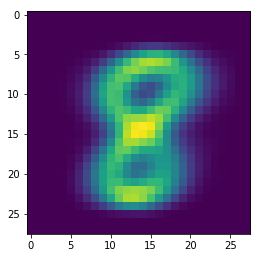

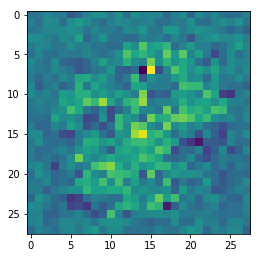

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Cost = 41.036587
Cost = 0.25181654
Cost = 0.14050683
Cost = 0.13769722
Cost = 0.13770252
Cost = 0.13770664
Cost = 0.1377774
Cost = 0.1377577
Cost = 0.13766466
Cost = 0.13770694
1.0
[[2.4403744e-05 2.7621465e-03 6.1075749e-05 3.3942479e-04 1.7582455e-05
  4.2978800e-03 3.6587378e-06 3.5475371e-03 1.3799119e-06 9.8894483e-01]]


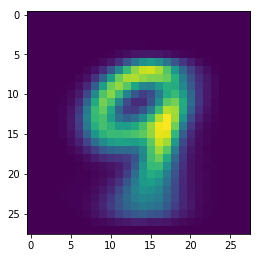

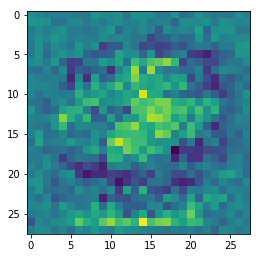

In [270]:
epochs = 1000

identity = np.identity(10)

ideal_inputs = list()

for label in range(10):
    sess.run(init_op)
    print(label)
    batch = mnist.test.labels[mnist.test.labels[:,label] == 1]
    print(batch[0])
    for epoch in range(epochs):
        _, c = sess.run([optimiser, cross_entropy], feed_dict={W1: trained_W1,
                                                        b1: trained_b1,
                                                        W2: trained_W2,
                                                        b2: trained_b2,
                                                        y: batch})
        if (epoch % 100 == 0):
            print("Cost = " + str(c))
    print(sess.run(accuracy, feed_dict={W1: trained_W1,
                                        b1: trained_b1,
                                        W2: trained_W2,
                                        b2: trained_b2,
                                        y: batch}))
    
    print(sess.run(y_clipped, feed_dict={W1: trained_W1,
                                b1: trained_b1,
                                W2: trained_W2,
                                b2: trained_b2,
                                y: batch}))
    trained_x = sess.run(x)
    ideal_inputs.append(trained_x)
    plt.imshow(np.mean(mnist.test.images[mnist.test.labels[:,label] == 1], axis=0).reshape((28,28)))
    plt.show()
    plt.imshow(trained_x.reshape((28,28)))
    plt.show()